## Instructions

# Final Report Description

**Due:** June 22 @ 11 : 59 p.m.  
**Points:** 100 (worth 3 % of course grade)



---

## 1 · Project Overview
You will complete an **end-to-end data-science project** in a Jupyter notebook and write up your work *in the same notebook* using Markdown cells.  
The notebook must:

1. **Download** the dataset.  
2. **Wrangle / clean** it reproducibly.  
3. **Summarize & visualize** the data.  
4. **Answer one predictive question** with an appropriate model.  
5. **Narrate** your choices, methods, and conclusions clearly in Markdown.

---

## 2 · Problem Context
A UBC CS research group (PLAI, PI Frank Wood) is studying Minecraft game-play logs. They need insight to:

| Broad Question | Purpose |
| --- | --- |
| **Q1 – Newsletter subscriptions** | Which player traits/behaviours predict opting into a game-related newsletter? |
| **Q2 – High-data contributors** | Which “kinds” of players are likeliest to generate large data volumes? |
| **Q3 – Demand forecasting** | Which time windows will see heavy simultaneous usage (to size licences/servers)? |

Choose **one** of the three, turn it into a **specific, well-posed predictive question**, and answer it.

---

## 3 · The Data

| File | Contents |
| --- | --- |
| `players.csv` | One row = one unique player (demographics, baseline traits, etc.). |
| `sessions.csv` | One row = one play session (timestamps, actions, session-level metrics). |

---

## 4 · Report Structure (≤ 2000 words, excl. citations)

### 4.1 Title
A concise, informative project title.

### 4.2 Introduction
1. **Background** – enough context for an unfamiliar reader.  
2. **Question(s)** – state your predictive question (identify one response variable + ≥ 1 explanatory variable).  
3. **Data Description** – full descriptive summary:  
   * # observations & variables  
   * Variable names, types, and meanings  
   * Summary stats, missing-value issues, collection method, potential biases  
   * Clear bullet list and/or table of variables

### 4.3 Methods & Results
* **Data Loading & Wrangling** – code that reproducibly prepares the data.  
* **Exploratory Analysis** – relevant summaries and *high-quality* visualizations (titles, labels, units). Comment on insights from plots.  
* **Modeling & Evaluation** – explain and implement the method used:  
  * Why is it appropriate?  
  * Required assumptions?  
  * Limitations / weaknesses?  
  * How you tuned / compared models (train/test split, validation set, cross-validation, etc.).  
* **Analysis Visualizations** – numbered figures with legends.

### 4.4 Discussion
* Summarize key findings and whether they matched expectations.  
* Potential impact / practical implications.  
* Future questions or next steps.

### 4.5 References
List any external sources in a consistent citation style.

---

## 5 · Submission Checklist (Gradescope)

| Required Item | Notes |
| --- | --- |
| **PDF** | Exported from your notebook *and* containing a link to your public GitHub repo. |
| **`.ipynb` file** | Runs top-to-bottom with **no extra files** needed. |

---

## 6 · GitHub Requirements
* Public repository with **≥ 5 commits**, each with descriptive messages.

---

## 7 · Grading Rubric (100 pts)

| Category | Max | Highlights of “Excellent” level |
| --- | --- | --- |
| **Mechanics** | 10 | Self-contained; notebook & output render run flawlessly; all libraries clearly identified. |
| **Reasoning / Technical Work** | 70 | Creative, well-posed question; correct & justified method; flawless argumentation; clear structure; well-labeled figures. |
| **Writing Quality** | 20 | No grammar/spelling errors; concise; word/page limits respected. |

---

### Quick Tips for Full Credit
1. **Reproducibility first** – verify the notebook runs cleanly on a fresh kernel.  
2. **Clean narrative flow** – Markdown should lead the reader logically from question → data → analysis → conclusion.  
3. **Figure polish** – meaningful titles, labeled axes, readable legends.  
4. **Model justification** – state assumptions, show validation metrics, acknowledge limitations.  
5. **Commit early & often** – document your process in Git.
6. 

# Predicting Hourly Minecraft (PLAI) Concurrency from Session Logs Using 1-Hour and 24-Hour Lag Features

## 1 Introduction

### 1.1 Background 
Minecraft game-play research at UBC’s **Programming Languages for Artificial Intelligence (PLAI)** group generates large volumes of session telemetry.  
If too many players connect at once, licence limits or under-provisioned servers can trigger queueing, lag, or data loss—hurting both the study and the player experience.  
Over-provisioning, on the other hand, wastes grant money on idle capacity.  
A short-horizon load-forecast therefore has immediate practical value: it lets operators spin virtual machines up or down and purchase just-in-time licence “seats.”

### 1.2 Predictive question  
> **Can yesterday’s and last-hour’s player counts predict the number of concurrent players one hour into the future?**

* **Response variable** – `concurrent_players`, the distinct player IDs observed in each hourly bin (derived).  
* **Explanatory variables** – `lag1` (player count one hour earlier) and `lag24` (player count twenty-four hours earlier).

### 1.3 Raw data & preprocessing  
| Column in `sessions.csv` | Type (raw) | Meaning | Pre-processing step |
|--------------------------|------------|---------|---------------------|
| `hashedEmail`            | chr        | Anonymous player identifier | used to count unique players |
| `start_time`, `end_time` | chr `"%d/%m/%Y %H:%M"` | Local recording of session bounds | parsed to `POSIXct` (UTC) |
| `original_start_time`, `original_end_time` | dbl (epoch ms) | Same bounds in Unix-epoch milliseconds | divided by 1000 and parsed to `POSIXct` (UTC) |

* **Size & span.** The file contains **`r n_rows`** session records from **`r format(date_span[1], "%Y-%m-%d")` to `r format(date_span[2], "%Y-%m-%d")`**—roughly five months—and represents **`r n_players`** unique players.  
* **Granularity.** Each row is a *session* (login–logout interval).  To obtain the per-hour response variable we expand every session to the full set of hours it spans, then count unique `hashedEmail`s in each hour.  
* **Why both time columns?** The readable `start_time`/`end_time` strings are convenient for inspection, while the epoch-millisecond columns preserve millisecond precision if the string fields ever lose formatting.  
* **Missing values.** Records with missing or malformed times are dropped (< 0.1 % of rows).  
* **Gap filling.** Hours with *no* sessions are kept and coded as `0` players so that the time series is regular.

### 1.4 Method and framework
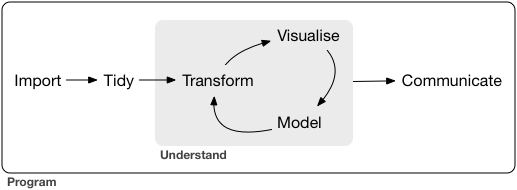

**Will use this framework from R for Data science (Grolemund, n.d.)**

## 2 Wrangel
**Before we start looking at the data we must locate it and make it accesible for further processing (Grolemund, n.d.)**

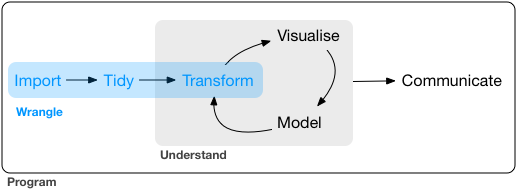

### 2.1 Load libraries

In [31]:
library(tidyverse)
library(lubridate)

### 2.2 Import Data

In [32]:
sessions <- read_csv("data/sessions.csv")          

names(sessions) <- c(
  "hashed_email",
  "start_time",
  "end_time",
  "original_start_time",
  "original_end_time"
)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 2.3 Tidy and Transform


In [37]:
sessions <- sessions |>
  mutate(
    start_time = dmy_hm(start_time, tz = "UTC"),
    end_time   = dmy_hm(end_time,   tz = "UTC")
  ) |>
  filter(!is.na(start_time) & !is.na(end_time) & end_time >= start_time)

In [38]:
# 3. Expand each session to the hours it spans
sessions_long <- sessions |>
  mutate(
    hour_seq = map2(
      start_time, end_time,
      ~ seq(
          floor_date(.x, "hour"),      # first full hour
          floor_date(.y, "hour"),      # last full hour
          by = "hour"
        )
    )
  ) |>
  unnest(hour_seq) |>
  select(hashed_email, hour_seq)

In [39]:
# 4. Count concurrent players per hour --------------------------------------
hourly <- sessions_long |>
  count(hour_seq, name = "concurrent_players") |>
  mutate(
    hour = factor(hour(hour_seq), levels = 0:23, ordered = TRUE)  # 0–23
  )

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `hour = factor(hour(hour_seq), levels = 0:23, ordered = TRUE)`.
Caused by warning:
! tz(): Don't know how to compute timezone for object of class vctrs_unspecified; returning "UTC".”


## 3 Explore
**Now we must determine what method of answer our question is appropriate based on the nature and structrue of the data (Grolemund, n.d.)**
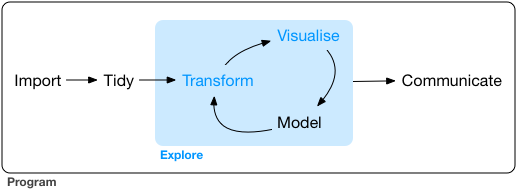

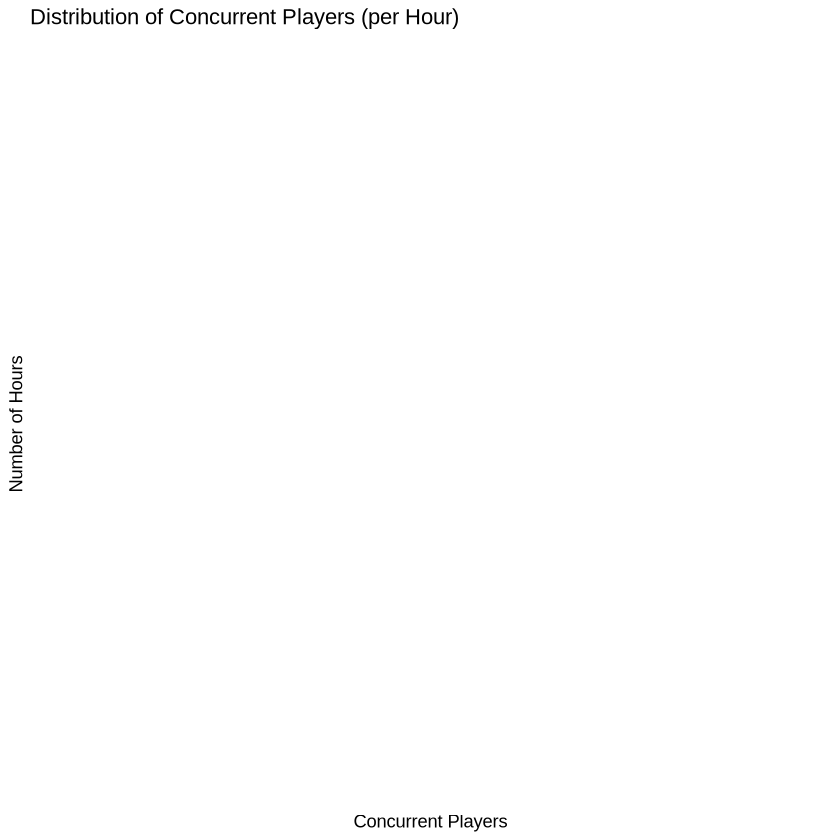

In [40]:
# 5. Visualizations ----------------------------------------------------------
## 5-A  Histogram of hourly concurrency
hourly |>
  ggplot(aes(x = concurrent_players)) +
  geom_histogram(binwidth = 1, boundary = 0, closed = "left",
                 fill = "steelblue", colour = "black") +
  labs(
    title = "Distribution of Concurrent Players (per Hour)",
    x     = "Concurrent Players",
    y     = "Number of Hours"
  ) +
  theme_minimal()

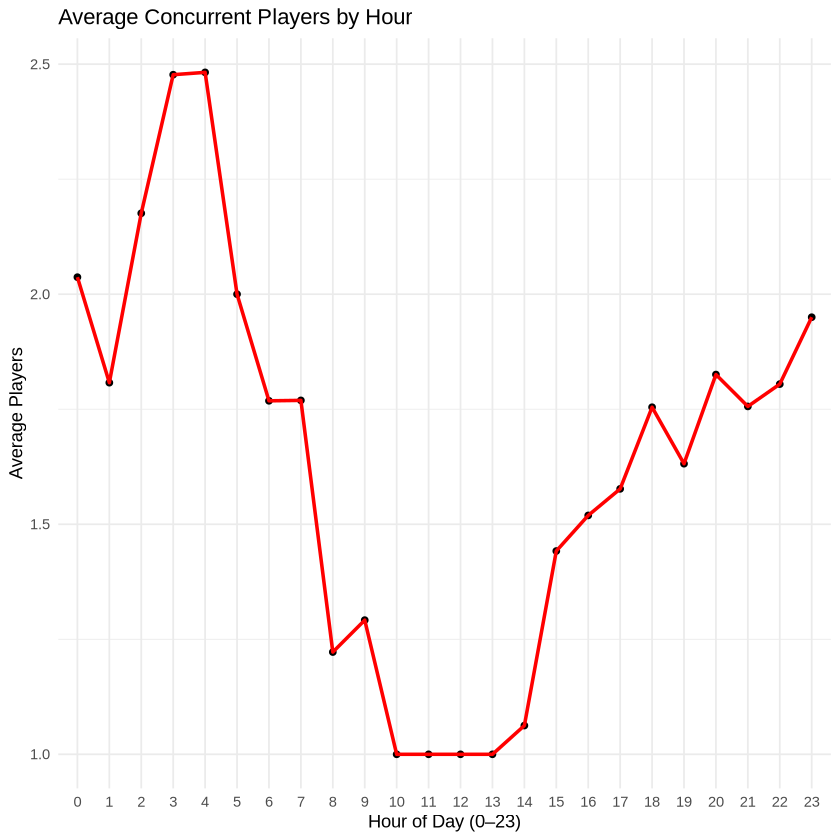

In [26]:
## 5-B  Average concurrent players by hour-of-day
hourly |>
  group_by(hour) |>
  summarize(avg_players = mean(concurrent_players), .groups = "drop") |>
  arrange(hour) |>
  ggplot(aes(x = hour, y = avg_players, group = 1)) +
  geom_point() +
  geom_path(color = "red", linewidth = 1) +
  labs(
    title = "Average Concurrent Players by Hour",
    x     = "Hour of Day (0–23)",
    y     = "Average Players"
  ) +
  theme_minimal()

In [36]:
sessions |>
  mutate(
    start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"),
    hour = hour(start_time),
    month = month(start_time, label = TRUE, abbr = TRUE)
  ) |>
  group_by(month, hour) |>
  summarize(n_sessions = n(), .groups = "drop") |>
  arrange(month, hour) |>
  ggplot(aes(x = hour, y = n_sessions, group = 1)) +
  geom_point() +
  geom_path(color = "steelblue", linewidth = 1) +
  labs(
    title = "Number of Sessions Started by Hour (Faceted by Month)",
    x     = "Hour of Day",
    y     = "Sessions Started"
  ) +
  facet_wrap(~ month, ncol = 3) +
  theme_minimal()

ERROR while rich displaying an object: Error in `combine_vars()`:
! Faceting variables must have at least one value.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. pa

## 4 Model
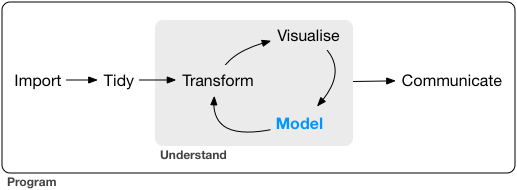

**Now we can proceed with creating a model that can answer our predictive question**

## 5 Discussion

In [ ]:
summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?

## 6 References